In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report

# Bringing it all together I: Pipeline for classification

It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are 'C' and 'gamma' controls the regularization strength. It is analogous to the 
C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course.

The following modules and functions have been pre-loaded: Pipeline, SVC, train_test_split, GridSearchCV, classification_report, accuracy_score. The feature and target variable arrays X and y have also been pre-loaded.

In [215]:
# Data importing
dataset = pd.read_csv('datasets/winequality-red.csv', sep=';')

# Create arrays for the features and the response variable
y = dataset['quality'].values
X = dataset.drop('quality', axis=1).values

In [216]:
# Setup the pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1,10,100],
              'SVM__gamma':[0.1,0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]})

In [217]:
# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metris
print("Accuracy: {}", format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}", format(cv.best_params_))

Accuracy: {} 0.6575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.06      0.08        17
           5       0.67      0.79      0.72       158
           6       0.67      0.66      0.66       167
           7       0.69      0.51      0.59        53
           8       0.00      0.00      0.00         3

    accuracy                           0.66       400
   macro avg       0.36      0.34      0.34       400
weighted avg       0.64      0.66      0.64       400

Tuned Model Parameters: {} {'SVM__C': 10, 'SVM__gamma': 0.1}


# Bringing it all together II: Pipeline for regression

For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself!

Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as X and y.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


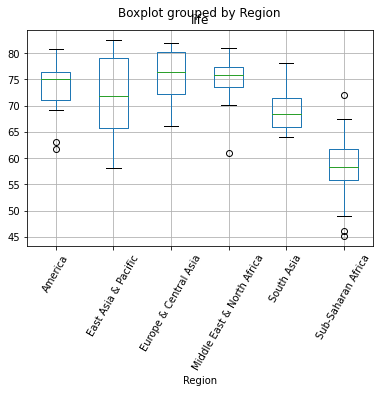

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   population                         139 non-null    float64
 1   fertility                          139 non-null    float64
 2   HIV                                139 non-null    float64
 3   CO2                                139 non-null    float64
 4   BMI_male                           139 non-null    float64
 5   GDP                                139 non-null    float64
 6   BMI_female                         139 non-null    float64
 7   life                               139 non-null    float64
 8   child_mortality                    139 non-null    float64
 9   Region_East Asia & Pacific         139 non-null    uint8  
 10  Region_Europe & Central Asia       139 non-null    uint8  
 11  Region_Middle East & North Africa  139 non-null    uint8  

In [218]:
# Data importing
df = pd.read_csv('datasets/gm_2008_region.csv')

# Categorical variable exploration and treatment
df.info()

df.boxplot('life','Region', rot=60)
plt.show()

# Create dummy variables with drop_first=True: df
df = pd.get_dummies(df, drop_first=True)

# Plot the dataframe column names
print(df.info())

In [219]:
# Create arrays for the features and the response variable
y = df['life'].values
X = df.drop('life', axis=1).values

In [220]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.632e+02, tolerance: 4.519e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.993e+02, tolerance: 5.124e-01 Linear regression models with null weight for the l1 regularization term are mor

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

In [221]:
# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771036
